title: "Clase 2"
output: html_document
date: "2024-08-05"

In [1]:
#!pip install numpy matplotlib scipy scikit-learn seaborn ace_tools statsmodels

# Clase 2. El modelo de regresi√≥n lineal

## Para qu√©?
Relaciona variables en t√©rminos causales, a diferencia del coeficiente de corr.
La corr X y Y es sim√©trica. La regresi√≥n X y Y es distinta de Y y X.
Entonces. Es una t√©cnica que utilizamos para predecir una variable en funci√≥n
de otra u otras. 

El ejemplo siguiente muestra como no es simetrica la regresi√≥n. AUnque no tiene sentido teorico este ejemplo (citas causando a√±os de estudio) sirve para ilustrarlo

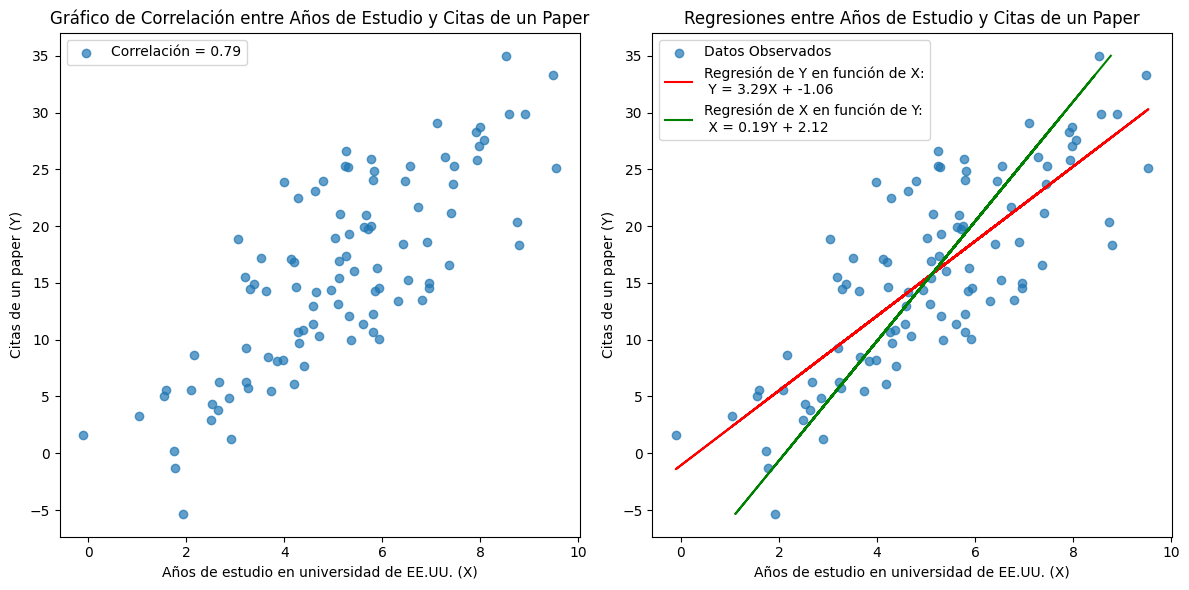

In [2]:
import numpy as np  # Importa la biblioteca NumPy para manipulaci√≥n num√©rica y generaci√≥n de datos aleatorios.
import matplotlib.pyplot as plt  # Importa Matplotlib para generar gr√°ficos.
from scipy.stats import pearsonr  # Importa la funci√≥n pearsonr de SciPy para calcular la correlaci√≥n de Pearson.
from sklearn.linear_model import LinearRegression  # Importa la clase LinearRegression para crear modelos de regresi√≥n lineal.
from scipy import stats

# Generaci√≥n de datos simulados
np.random.seed(0)  # Fija una semilla para que los resultados sean reproducibles (los mismos datos aleatorios cada vez).
X = np.random.normal(5, 2, 100)  # Genera 100 valores de una distribuci√≥n normal para "a√±os de estudio".
# La media es 5, y la desviaci√≥n est√°ndar es 2, representando el tiempo promedio y variaci√≥n en a√±os de estudio.
Y = 3 * X + np.random.normal(0, 5, 100)  # Genera "citas del paper" en funci√≥n de X, con una relaci√≥n lineal y algo de ruido.
# Cada valor de Y es tres veces X m√°s un ruido aleatorio normal con media 0 y desviaci√≥n est√°ndar 5.

# C√°lculo de la correlaci√≥n
correlation, _ = pearsonr(X, Y)  # Calcula el coeficiente de correlaci√≥n de Pearson entre X y Y.
# El coeficiente de Pearson indica la fuerza y direcci√≥n de la relaci√≥n lineal entre las dos variables.
# El segundo valor, ignorado aqu√≠ (_), es el valor p asociado a la correlaci√≥n.

# Gr√°fico de correlaci√≥n
plt.figure(figsize=(12, 6))  # Crea una figura de tama√±o 12x6 para organizar dos gr√°ficos lado a lado.

plt.subplot(1, 2, 1)  # Define la primera subgr√°fica en una cuadr√≠cula de 1x2 (dos gr√°ficos en la misma fila).
plt.scatter(X, Y, alpha=0.7, label=f"Correlaci√≥n = {correlation:.2f}")  # Crea un gr√°fico de dispersi√≥n de X vs. Y.
plt.xlabel("A√±os de estudio en universidad de EE.UU. (X)")  # Etiqueta del eje X explicando el significado de X.
plt.ylabel("Citas de un paper (Y)")  # Etiqueta del eje Y explicando el significado de Y.
plt.title("Gr√°fico de Correlaci√≥n entre A√±os de Estudio y Citas de un Paper")  # T√≠tulo que describe el gr√°fico.
plt.legend()  # A√±ade una leyenda para mostrar el valor de correlaci√≥n calculado.

# Modelo de regresi√≥n Y en funci√≥n de X
# reshape(-1, 1) convierte el arreglo 1D X en una matriz 2D de una columna y m√∫ltiples filas, necesario para sklearn.
model_Y_X = LinearRegression().fit(X.reshape(-1, 1), Y)  # Ajusta un modelo de regresi√≥n lineal para predecir Y usando X.
Y_pred = model_Y_X.predict(X.reshape(-1, 1))  # Genera predicciones de Y en funci√≥n de los valores de X.
slope_Y_X = model_Y_X.coef_[0]  # Obtiene la pendiente del modelo (coeficiente de X en la ecuaci√≥n Y = mX + b).
intercept_Y_X = model_Y_X.intercept_  # Obtiene el intercepto del modelo (valor de Y cuando X=0 en la ecuaci√≥n Y = mX + b).

# Modelo de regresi√≥n X en funci√≥n de Y
# reshape(-1, 1) tambi√©n convierte Y en una matriz 2D, necesaria para el ajuste del modelo de regresi√≥n.
model_X_Y = LinearRegression().fit(Y.reshape(-1, 1), X)  # Ajusta un modelo de regresi√≥n para predecir X usando Y.
X_pred = model_X_Y.predict(Y.reshape(-1, 1))  # Genera predicciones de X en funci√≥n de los valores de Y.
slope_X_Y = model_X_Y.coef_[0]  # Obtiene la pendiente del modelo de X en funci√≥n de Y.
intercept_X_Y = model_X_Y.intercept_  # Obtiene el intercepto del modelo de X en funci√≥n de Y.

# Gr√°fico de regresiones
plt.subplot(1, 2, 2)  # Define la segunda subgr√°fica en la cuadr√≠cula de 1x2.
plt.scatter(X, Y, alpha=0.7, label="Datos Observados")  # Grafica el mismo diagrama de dispersi√≥n de los datos observados.
plt.plot(X, Y_pred, color='r', label=f"Regresi√≥n de Y en funci√≥n de X:\n Y = {slope_Y_X:.2f}X + {intercept_Y_X:.2f}")
# Dibuja la l√≠nea de regresi√≥n que predice Y usando X, mostrando su ecuaci√≥n en la leyenda.
plt.plot(X_pred, Y, color='g', label=f"Regresi√≥n de X en funci√≥n de Y:\n X = {slope_X_Y:.2f}Y + {intercept_X_Y:.2f}")
# Dibuja la l√≠nea de regresi√≥n que predice X usando Y, tambi√©n con su ecuaci√≥n.
plt.xlabel("A√±os de estudio en universidad de EE.UU. (X)")  # Etiqueta del eje X.
plt.ylabel("Citas de un paper (Y)")  # Etiqueta del eje Y.
plt.title("Regresiones entre A√±os de Estudio y Citas de un Paper")  # T√≠tulo del gr√°fico.
plt.legend()  # A√±ade una leyenda que muestra las ecuaciones de regresi√≥n.

plt.tight_layout()  # Ajusta el espaciado entre gr√°ficos para que no se sobrepongan.
plt.show()  # Muestra los gr√°ficos en pantalla.


## Por qu√©? El problema fundamental de la inferencia causal.  El Pablo de Schrodinger
Regrresi√≥n surge en el marco de los estudios observacionales
Pablo es un tipo normal que actualmente vive una situaci√≥n. No est√° feliz con su vida.
Pablo, como muchas personas, busca una explicaci√≥n al porqu√© y considera (de manera simplista) que el 
problema fundamental de su vida es su pareja. 

Es decir, tiene la hip√≥tesis de que D (su pareja) ha causado Y (una calidad de vida baja)
                  D ‚Üí Y
                  
De qu√© manera Pablo podr√≠a probar su hip√≥tesis? 

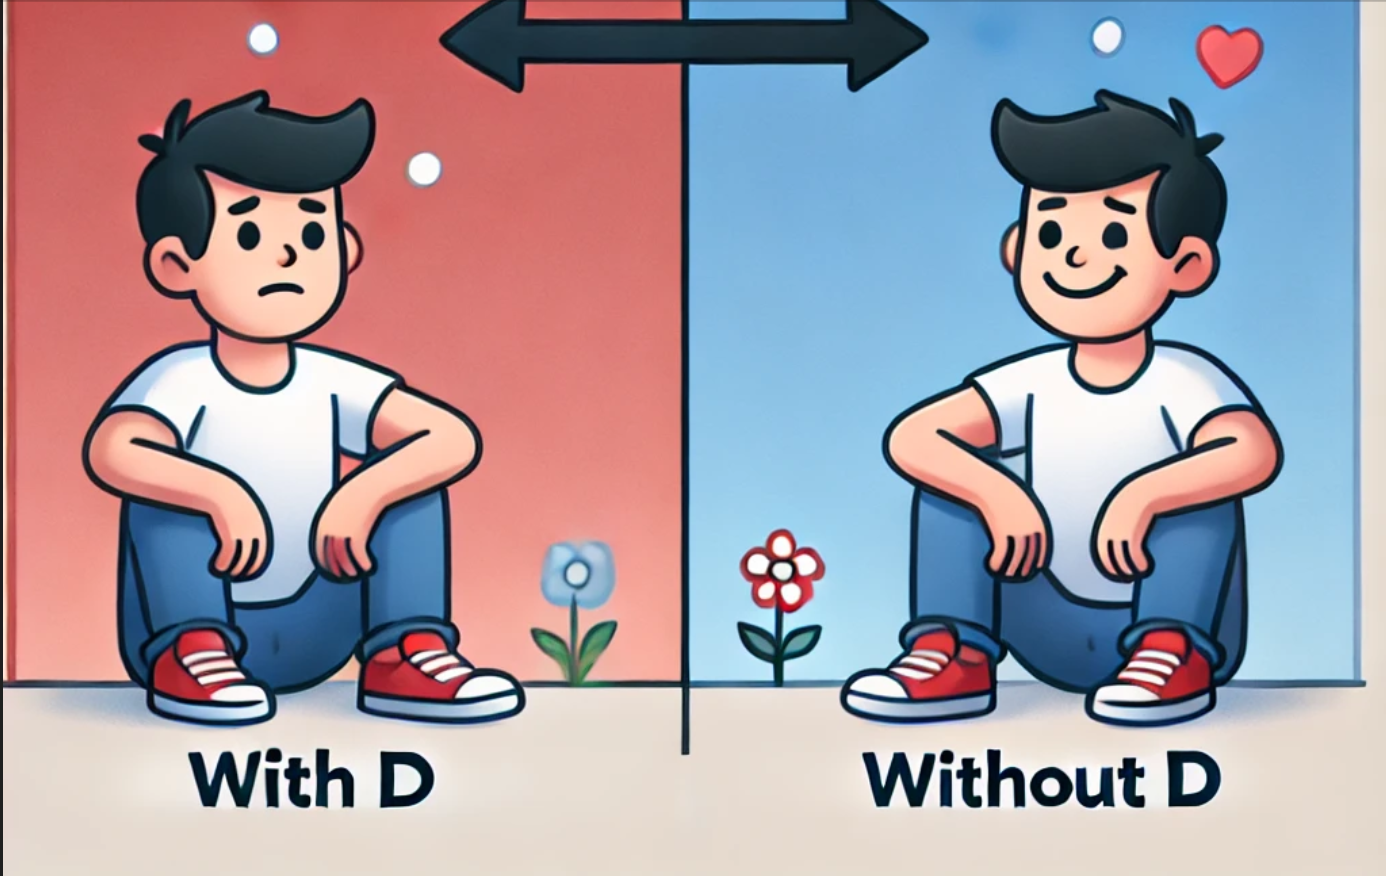

## Respuesta 
Pudiendo conocer si su vida hubiese sido mejor si, Pablo del pasado
no hubiese iniciado una relaci√≥n con la persona que actualmente es su pareja
y comparar su calidad de vida en ambas situaciones.

## Por qu√©?
Por qu√© en otro momento, cambiaron las circunstancias que tambi√©n afectan el resultado
de un modo u otro. Y si no es el mismo Pablo se estar√≠an midiendo cosas distintas.
El unico camino ser√≠a ese universo paralelo, EL CONTRAF√ÅCTICO. 

**Esto es lo que se conoce como 'EL MARCO DE LOS ESTADOS POTENCIALES'**
Es decir, hay un estado potencial para el hecho de que Pablo no conociera a su 
pareja (D=0, con pablo Y0) y otro donde Pablo s√≠ la conoci√≥ y estableci√≥ una 
relaci√≥n con ella (D=1 con pablo Y1).

Si pudieramos tener informaci√≥n de esos dos estados, si ambos se hubieran realizado, podr√≠amos medir la calidad de vida de ambos pablos y restarlas.
Si al tiempo que conoci√≥ a su pareja no ocurri√≥ nada m√°s, es l√≥gico atribuir que la diferencia observada en los niveles de calidad de vida se deben a haber conocido a su pareja. Es decir 
                            Œ¥ = y1-y0

Como ya habremos notado, es IMPOSIBLE que pablo haya existido en ambos estados. 
S√≥lo ocurri√≥ uno. Entonces, no es posible, a nivel individual, medir esa diferencia.

Dado lo anterior, **se encontr√≥ que, bajo ciertas circunstancias (Supuestos), es posible
conseguir esta medici√≥n pero a nivel agregado**. 

### Resumen del problema y la soluci√≥n
Problema: un individuo (Y) no puede tener sus mismas caracter√≠sticas y experimentar
dos estados potenciales. Por lo que no podemos medir el efecto de una intervenci√≥n
en √©l.
Soluci√≥n: elementos Yi pueden experimentar Salidas Yi0 (bajo control) o Yi1 (bajo tratamiento),
a nivel individual y pueden compararse a nivel de grupos (Grupo D=1 vs Grupo D=0). Es decir, a nivel de sus caracteristicas van a tener diferentes medidas de √©stas pero van a compartir formar parte de un grupo u otro

**Por qu√© pueden compararse?**
Por qu√© bajo diversos escenarios (control aleatorio o cumplimiento de supuestos) Los elementos que van alterar el resultado (errores œµ) sub o sobreestimando el efecto de D=1 o de D=0 tienden a eliminarse. 

**EJEMPLO**

Pongamos un ejemplo, queremos saber el efecto que tiene la administraci√≥n de un medicamento (D) sobre el bienestar (Y) en fumadores. Como ya vimos, una persona Yi va a experimentar o bien la administraci√≥n del medicamento (D=1) o bien estar el el grupo que recibe un placebo (D=0), NO PUEDE ESTAR EN AMBOS. 

Asumamos que est√° en el grupo de tratamiento (D=1); es posible que un sujeto Yj se le parezca y est√© en el grupo de control (D=0), la diferencia en el efecto del medicamento no ser√≠a correcta por estas diferencias entre los sujetos que van a alterar el resultado. 

Sin embargo, como ya vimos, a nivel agregado, si los errores se distribuyen normalmente
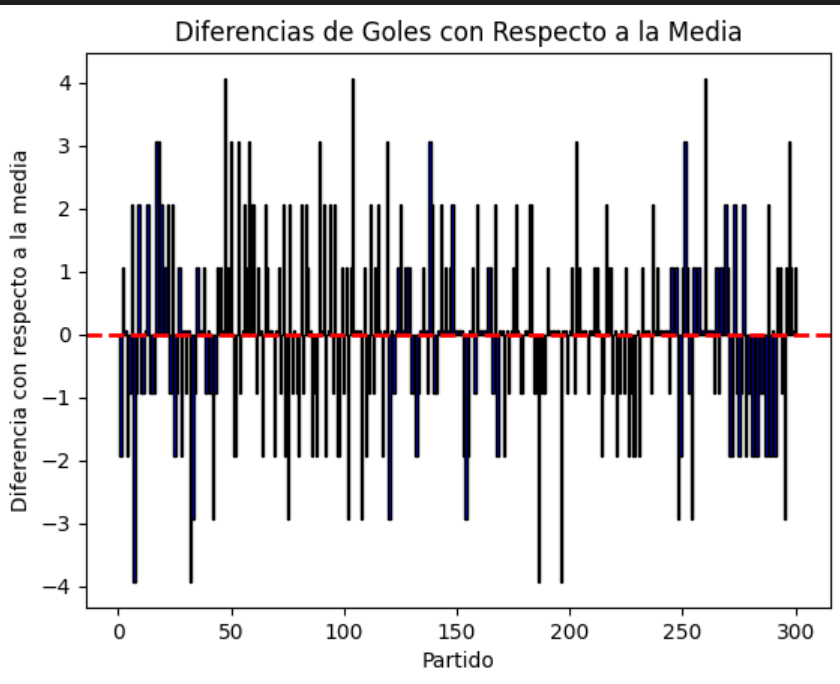

 (despu√©s discutimos cuando pasa esto) aquello que subestima o sobreestima la relaci√≥n de D con Y se elimina. Es decir, se cumple que, para ambos grupos, en ausencia de tratamiento, el valor esperado de ambos grupos (bienestar, sin intervenci√≥n) es el mismo.

Siguiendo con el ejemplo:

Asumamos que el efecto de D se ve afectado por **fumar, hacer ejercicio y leer**. 
Entonces, en los grupos D=0 o D=1 hay individuos que fuman m√†s o menos que otros, hacen m√†s o menos ejercicio o leen m√†s o menos (la linea base, de la que parten todos los individuos). Cumpliendose ciertas condiciones, en el agregado, el efecto de estas variables se vuelve id√©ntico en ambos grupos. Y, si no hubiese variables extra, y solo fueran errores aleatorios, igual la suma de 
estos errores es identico en ambos grupos, **entonces dichos errores dejan de ser importantes para evaluar el efecto medio de la intervenci√≥n.**

### La diferencia de medias
Cuando lo anterior ocurre, basta entonces con obtener el promedio de los outputs (resultados)Y1, que corresponde a quienes recibieron el tratamiento y restarle Y0, que corresponde a la media de quienes no lo recibieron. A nivel de grupos entonces es posible cumplir con:
                              Œ¥ = y1-y0
Se conoce como ATE efecto medio del tratamiento.

Esto se cumple cuando la decisi√≥n de quienes est√°n en un grupo u otro es aleatoria.

Esto porque D (recibir tratamiento) es independiente del resultado (Y), y **POR DISE√ëO LOS EXPERIMENTOS FUNCIONAN DE ESTA MANERA.**

Es esto lo logra la aleatorizaci√≥n. Por esto, en los dise√±os experimentales, que tienen control sobre esta asignaci√≥n el problema est√° resuelto. 

                        Y0,Y1 ‚ä• D

## Los estudios Observacionales
Sin embargo, no es el caso en los estudios observacionales. Si los grupos no son seleccionados de manera aleatoria, entonces la media de la linea base (las condiciones de los grupos) simplemente no ser√°n las mismas y la estimaci√≥n sobre el efecto que se haga en el agregado estar√° sesgada. SESGO LINEA BASE debido al SESGO DE SELECCI√ìN.

Los estudios observacionales son aquellos donde no existe ni dependencia ni independencia de D sobre Y, debido ya que suelen ser registros de situaciones donde el dise√±o experimental (que permite la aleatorizaci√≥n) no es posible o no es √©tico.

## Por qu√© no basta la diferencia de medias en los estudios observacionales?
Entonces, debido a que la configuraci√≥n de miembros en ambos grupos, misma que cumpla una distribuci√≥n tal (la normal que vimos en el ejemplo de los goles) que haga que el error sea el mismo en ambos es mucho menos probable que todas las otras donde esto no es as√≠, asumimos que en los estudios observacionales no se cumple la condici√≥n de independencia. 

Debido a ello, la diferencia de medias en estudios observacionales ofrecer√° una estimaci√≥n sesgada, ya sea subestimada o sobreestimada, la cual se conoce como **el estimador inocente**. 

En este punto dejaremos la discusi√≥n aqu√≠ para hablar sobre el modelo de regresi√≥n lineal.
Esta introducci√≥n es importante para que los conceptos que ahora vamos a tratar 
sean mejor entendidos, ya que es en el marco del problema fundamental de inferencia causal
reci√©n referido que esta tiene sentido. 

# El modelo de regresi√≥n
## **El modelo de regresi√≥n**
En el marco de lo que hemos discutido, el modelo sirve para obtener el efecto que tiene una variable X sobre una variable Y (decimos tratamiento cuando esta variable es dicotomica), as√≠ que la diferencia de medias es parte de los resultados del modelo de regresi√≥n. 

Sin embargo, veremos c√≥mo no basta con tener el efecto de la variable X para poder predecir, teniendo un valor especifico para X (Xi) el valor de la variable Y. Esto es as√≠ debido a que, a diferencia de la Esperanza "unidimensional" que vimos en la primera parte de este curso, en el modelo de regresi√≥n estamos considerando la existencia de al menos dos variables en juego (X y Y). Ahora veremos a qu√© me refiero exactamente con esto. 

## Un promedio en dos dimensiones
Cuando hablamos del primedio como esperanza, podemos imaginar que la media es un promedio es una sola dimensi√≥n, ya que tenemos un conjunto N de numeros que podemos poner sobre una l√≠nea, en la cual, la media es como vimos el valor que consigue que los residuos sean los m√°s peque√±os posibles. 

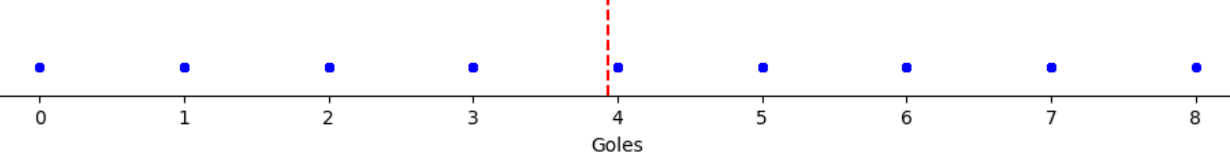


En el modelo de regresi√≥n, al involucrar al menos dos variables (en la regresi√≥n lineal simple hablamos EXCLUSIVAMENTE de dos variables) los valores que tenemos necesariamente deben aparecer en un plano, donde se asocia un valor Xi con un valor Yi, es decir, valor espec√≠ficos para cada Variable X y Y. 

Supongamos el siguiente ejemplo que le da nombre a la regresi√≥n. La relaci√≥n causal entre la estatura de los padres (eje X, variable independiente, es decir variable causal o tambi√©n conocida como Regresor) y la estatura de los hijos (Eje Y, variable dependiente).

A modo de historia r√°pida, en alg√∫n momento se not√≥ que la estatura de la poblaci√≥n no crece al infinito, aunque los padres sean altos la estatura de los hijos de esa poblaci√≥n "regresaba" hacia el valor medio de la poblaci√≥n, con todo y los residuos que eso implica. Es decir, la estatura de los hijos tiene variaciones hacia arriba o hacia abajo del valor de la estatura de los padres, pero siempre el valor esperado de la estatura de los hijos es la media de la poblaci√≥n. 

La representaci√≥n cartesiana de este fen√≥meno se ve de la siguiente forma


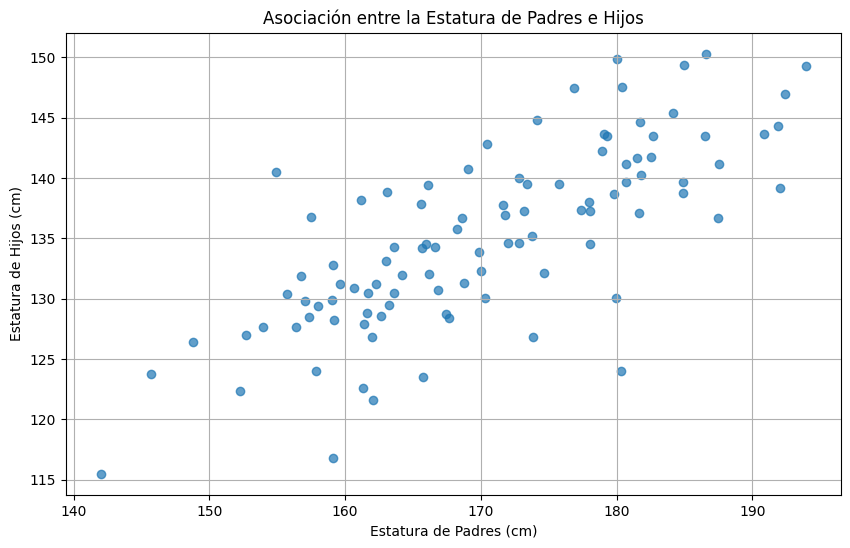

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Establecer la semilla para reproducibilidad
np.random.seed(123)

# Generar datos simulados para estatura de padres e hijos
# Supongamos que la estatura de los padres sigue una distribuci√≥n normal
estatura_padres = np.random.normal(loc=170, scale=10, size=100)

# Generar la estatura de los hijos como una funci√≥n lineal de la estatura de los padres con algo de ruido
estatura_hijos = 50 + 0.5 * estatura_padres + np.random.normal(loc=0, scale=5, size=100)

# Crear un DataFrame con los datos
df_estatura = pd.DataFrame({
    'Estatura_Padres': estatura_padres,
    'Estatura_Hijos': estatura_hijos
})

# Graficar la asociaci√≥n entre estatura de padres e hijos
plt.figure(figsize=(10, 6))
plt.scatter(df_estatura['Estatura_Padres'], df_estatura['Estatura_Hijos'], alpha=0.7)
plt.title("Asociaci√≥n entre la Estatura de Padres e Hijos")
plt.xlabel("Estatura de Padres (cm)")
plt.ylabel("Estatura de Hijos (cm)")
plt.grid(True)
plt.show()


Trabajando en un nivel unidimensional ya vimos que la media es un punto que corta la linea donde aparecen los valores de los que surge el promedio. Trasladando este razonamiento, involucrando dos o m√°s variables, la esperanza no es un punto, sino una linea (dos dimensiones) en un plano o hiperplano. Y as√≠ como antes vimos que pueden existir diversos puntos desde los cuales existen diferentes valores para los residuos, en el caso bidimensional del plano donde representamos una asociaci√≥n de valores existen infinitas lineas desde las cuales existir√°n diferentes residuos. 


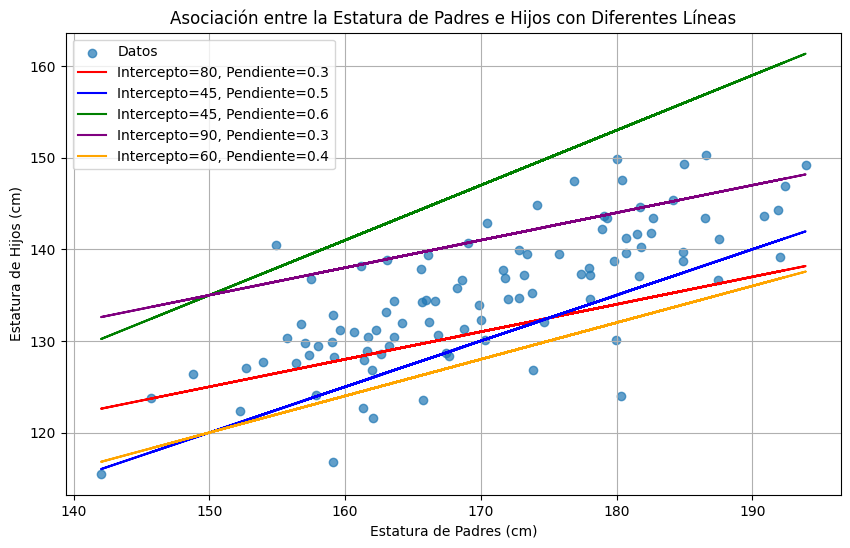

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Establecer la semilla para reproducibilidad
np.random.seed(123)

# Generar datos simulados para estatura de padres e hijos
estatura_padres = np.random.normal(loc=170, scale=10, size=100)
estatura_hijos = 50 + 0.5 * estatura_padres + np.random.normal(loc=0, scale=5, size=100)

# Crear un DataFrame con los datos
df_estatura = pd.DataFrame({
    'Estatura_Padres': estatura_padres,
    'Estatura_Hijos': estatura_hijos
})

# Graficar la asociaci√≥n entre estatura de padres e hijos con m√∫ltiples l√≠neas
plt.figure(figsize=(10, 6))
plt.scatter(df_estatura['Estatura_Padres'], df_estatura['Estatura_Hijos'], alpha=0.7, label="Datos")

# A√±adir varias l√≠neas con diferentes interceptos y pendientes
plt.plot(df_estatura['Estatura_Padres'], 80 + 0.3 * df_estatura['Estatura_Padres'], color="red", label="Intercepto=80, Pendiente=0.3")
plt.plot(df_estatura['Estatura_Padres'], 45 + 0.5 * df_estatura['Estatura_Padres'], color="blue", label="Intercepto=45, Pendiente=0.5")
plt.plot(df_estatura['Estatura_Padres'], 45 + 0.6 * df_estatura['Estatura_Padres'], color="green", label="Intercepto=45, Pendiente=0.6")
plt.plot(df_estatura['Estatura_Padres'], 90 + 0.3 * df_estatura['Estatura_Padres'], color="purple", label="Intercepto=90, Pendiente=0.3")
plt.plot(df_estatura['Estatura_Padres'], 60 + 0.4 * df_estatura['Estatura_Padres'], color="orange", label="Intercepto=60, Pendiente=0.4")

# Configuraci√≥n del gr√°fico
plt.title("Asociaci√≥n entre la Estatura de Padres e Hijos con Diferentes L√≠neas")
plt.xlabel("Estatura de Padres (cm)")
plt.ylabel("Estatura de Hijos (cm)")
plt.legend()
plt.grid(True)
plt.show()


Ahora, antes de seguir, c√≥mo asociamos el resultado de una variable a la aparici√≥n de otra?? El m√©todo para asociar un resultado a una variable no es otro que una funci√≥n. Si solo consideramos la existencia de una coordenada, una posible funci√≥n para ello podr√≠a ser la siguiente

In [5]:
x = 8
Y = 16
# La funci√≥n podr√≠a ser f(Y)= 2X 
resfun = 2*x

print (resfun)

# Aunque tambi√©n podr√≠a ser f(x)= x+8. Es decir, hay infinitas combinaciones de
# operaciones que pueden pasar por ese punto
resfun2=x+8
print (resfun2)

16
16


Al involucrar m√°s coordenadas (m√°s pares de observaciones) la funci√≥n es m√°s espec√≠fica, y una funci√≥n que pase por dos o m√°s puntos es necesariamente la funci√≥n de una linea recta (siempre y cuando la relaci√≥n entre variables sea lineal). Recordando, la funci√≥n de una recta es
                                         y= mX +b. 
Donde m es la pendiente, es decir, la inclinaci√≥n que representa la relaci√≥n de cambio entre un punto y otro en t√©rminos de sus valores Y y X pues 

                m= (y2-y1)/(x2-x1)
                
**En t√©rminos de la exposici√≥n anterior, este ser√≠a el efecto que tiene una variable sobre otra**

**EL valor de la pendiente es sigma**

Sin embargo, esa misma pendiente puede existir en diferentes partes del plano y tocar diferentes conjuntos de puntos. Por ello, una linea que toque dos puntos X,Y espec√≠ficos es una linea que est√° en un lugar tambi√©n espec√≠fico del plano.
Esta ubicaci√≥n de la pendiente viene dada por el intercepto (b). Que si bien se define como el punto donde la pendiente corta al Eje Y cuando el valor de X es cero, es, para fines pr√°cticos el punto que define la altura a la que se encuentra la linea que corresponde a dos puntos. De manera que permite darle una ubicaci√≥n espacial espec√≠fica a la linea de la funci√≥n.


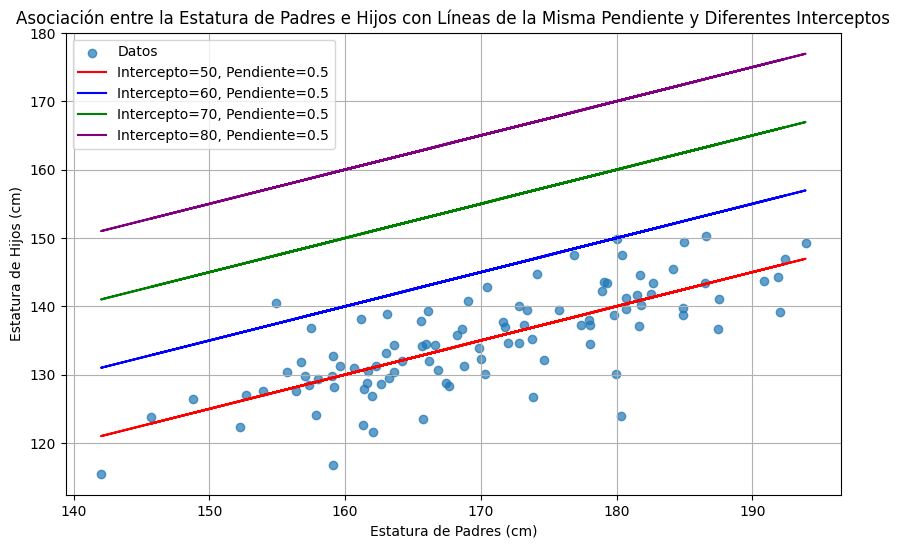

In [6]:
# Graficar la asociaci√≥n entre estatura de padres e hijos con m√∫ltiples l√≠neas
plt.figure(figsize=(10, 6))
plt.scatter(df_estatura['Estatura_Padres'], df_estatura['Estatura_Hijos'], alpha=0.7, label="Datos")

# A√±adir varias l√≠neas con la misma pendiente (0.5) pero diferentes interceptos
plt.plot(df_estatura['Estatura_Padres'], 50 + 0.5 * df_estatura['Estatura_Padres'], color="red", label="Intercepto=50, Pendiente=0.5")
plt.plot(df_estatura['Estatura_Padres'], 60 + 0.5 * df_estatura['Estatura_Padres'], color="blue", label="Intercepto=60, Pendiente=0.5")
plt.plot(df_estatura['Estatura_Padres'], 70 + 0.5 * df_estatura['Estatura_Padres'], color="green", label="Intercepto=70, Pendiente=0.5")
plt.plot(df_estatura['Estatura_Padres'], 80 + 0.5 * df_estatura['Estatura_Padres'], color="purple", label="Intercepto=80, Pendiente=0.5")

# Configuraci√≥n del gr√°fico
plt.title("Asociaci√≥n entre la Estatura de Padres e Hijos con L√≠neas de la Misma Pendiente y Diferentes Interceptos")
plt.xlabel("Estatura de Padres (cm)")
plt.ylabel("Estatura de Hijos (cm)")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Supongamos que tenemos dos pares de coordenadas para la altura de padres (X) # y de los hijos (Y), valores en cm
# Definir los valores de las coordenadas para altura de padres (X) y altura de hijos (Y)
x1 = 175
x2 = 165
y1 = 170
y2 = 172

# Calcular el valor de la pendiente
pendiente = (y2 - y1) / (x2 - x1)
print (pendiente)

# Calcular el intercepto
intercepto = y1 - (pendiente * x1)
print (intercepto)


-0.2
205.0


Con esto tenemos completa la ecuaci√≥n de la recta y nuestra funci√≥n en este caso
es
            f(x)= -0.2X + 205

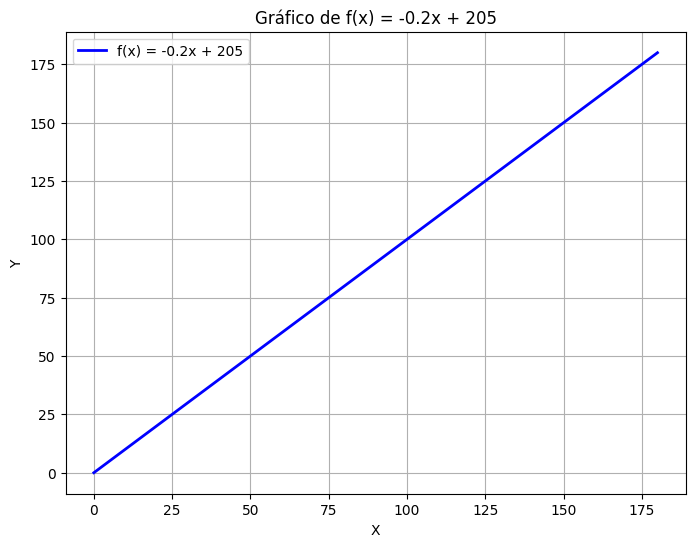

In [8]:
# Ajustar la escala para mostrar el corte en el eje Y cuando X=0
x_values = np.arange(0, 180.5, 0.5)  # Ampliar el rango de X desde 0 hasta 180

# Calcular los valores correspondientes de y
y_values = (x_values)

# Crear el gr√°fico
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, color="blue", linewidth=2, label="f(x) = -0.2x + 205")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gr√°fico de f(x) = -0.2x + 205")
plt.legend()
plt.grid(True)
plt.show()


Este es el procedimiento basico para obtener una linea Antes de seguir, llamemos a los puntos x1y1 padres1 y a los puntos x2y2 padres2.

Como se nota en el ejemplo que acabamos de desarrollar, a partir de los puntos padres1 y padres2, generamos una linea donde aparecen nuevos puntos adem√°s de  padres1 y padres2. Tener en mente que estos nuevos puntos encajan de manera perfecta con la funci√≥n que definimos, ya que, dada una funci√≥n, los puntos que aparecen al extender la recta que definimos est√°n DETERMINADOS POR DICHA FUNCION.

En ese sentido, la predicci√≥n es exacta, no hay lugar a errores. Si tenemos los puntos padres1 y padres2,sabemos con certeza absoluta qu√© puntos aparecer√°n ante un valor espec√≠fico de X. Esto es obvio. 

En este sentido, solo hay una linea posible.

En el caso de una regresi√≥n, como vimos en el ejemplo anterior, hay muchas funciones posibles para los puntos. **La relaci√≥n entre la variable independiente X y la variable dependiente Y NO ES DETERMINISTA. CADA FUNCION QUE PUEDA ESTABLECERSE SE VA A DESVIAR (residuos) DE LA LINEA DE FUNCION MATEMATICA. ES DECIR, LA PREDICION SIEMPRE TENDR√Å ERRORES. NO EXISTE LINEA QUE HAGA QUE TODAS LAS OBSERVACIONES SE COLOQUEN DENTRO DE ELLA. LO MAS A LO QUE PODEMOS LLEGAR ES A UNA LINEA QUE MINIMICE LA DISTANCIA DE TODOS LOS PUNTOS CON RELACION A ELLA**

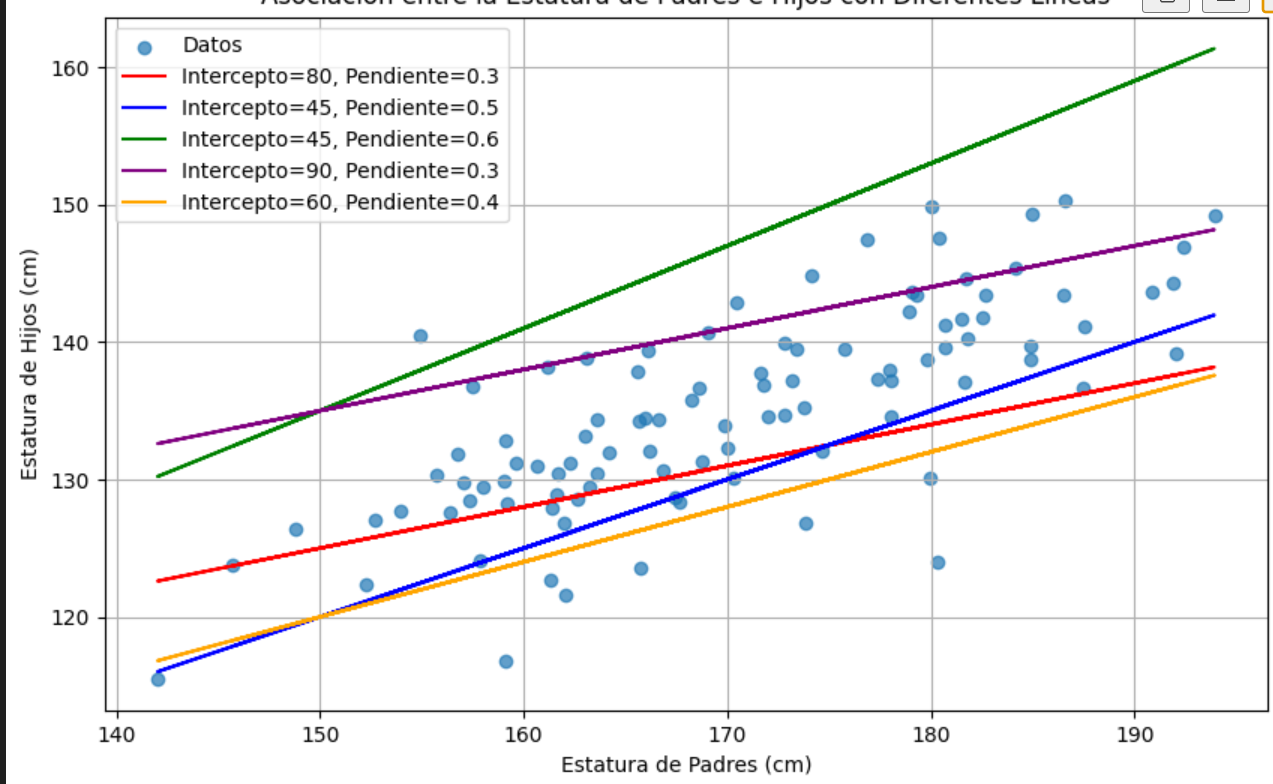

Llegamos a la idea intuitiva
* **EN ESTE SENTIDO, BUSCAMOS UNA LINEA QUE SEA LA PROMEDIO DE TODAS LAS LINEAS POSIBLES**

* **DE MANERA QUE LA ESPERANZA DE LA PREDICCION TENGA LA MENOR SUMATORIA DE RESIDUOS**.

Este es el fundamento de la regresi√≥n linea simple


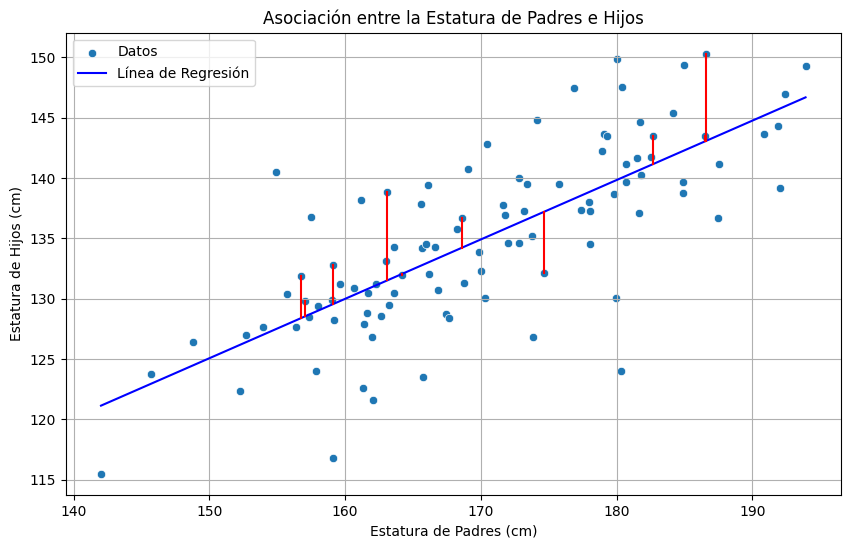

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Establecer la semilla para reproducibilidad
np.random.seed(123)

# Generar datos simulados para estatura de padres e hijos
estatura_padres = np.random.normal(loc=170, scale=10, size=100)
estatura_hijos = 50 + 0.5 * estatura_padres + np.random.normal(loc=0, scale=5, size=100)

# Crear un DataFrame con los datos
df_estatura = pd.DataFrame({
    'Estatura_Padres': estatura_padres,
    'Estatura_Hijos': estatura_hijos
})

# Ajustar el modelo de regresi√≥n lineal
modelo = LinearRegression()
X = df_estatura[['Estatura_Padres']]
y = df_estatura['Estatura_Hijos']
modelo.fit(X, y)

# Obtener los valores predichos
df_estatura['Predicted'] = modelo.predict(X)

# Seleccionar 10 puntos aleatorios para mostrar las distancias
np.random.seed(123)  # Para reproducibilidad
sample_indices = np.random.choice(df_estatura.index, size=10, replace=False)
df_sample = df_estatura.loc[sample_indices]

# Crear el gr√°fico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Estatura_Padres', y='Estatura_Hijos', data=df_estatura, label="Datos")
sns.lineplot(x='Estatura_Padres', y='Predicted', data=df_estatura, color="blue", label="L√≠nea de Regresi√≥n")

# A√±adir segmentos que representan las distancias (residuos) entre los puntos y la l√≠nea de regresi√≥n
for _, row in df_sample.iterrows():
    plt.plot([row['Estatura_Padres'], row['Estatura_Padres']], [row['Estatura_Hijos'], row['Predicted']], color="red")

# Configuraci√≥n del gr√°fico
plt.title("Asociaci√≥n entre la Estatura de Padres e Hijos")
plt.xlabel("Estatura de Padres (cm)")
plt.ylabel("Estatura de Hijos (cm)")
plt.legend()
plt.grid(True)
plt.show()


Como pudimos observar. El c√°lculo de "predicci√≥n" de otros puntos en la ecuaci√≥n de la recta, que se obtiene a partir de padres1 y padres2, o cualesquiera dos puntos es 
            y = xm + b
            
A lo largo de esta exposici√≥n deber√≠a haber quedado claro que la diferencia fundamental entre esa ecuaci√≥n y datos reales es que la realidad no puede seguir ese caracter determinista, ya que hay cuestiones que modifican el comportamiento de las observaciones (los puntos), es decir, hay errores. Por lo cual, para predecir un valor cualquiera vimos que, adem√°s de la pendiente (efecto del tratamiento) es necesario ubicar espacialmente esta pendiente, adem√°s de a√±adir los errores a los que la funci√≥n se encuentra sometida ante datos reales. POr ello, la ecuaci√≥n para obtener esta linea que minimiza los errores y que proporciona el efecto del tratamiento es la siguiente

                            
                            Y=Œ≤0+Œ≤1X+œµi
‚Äã
    
Donde 
y: Variable dependiente (respuesta).
x: Variable independiente (predictor).
Œ≤0: Intercepto del modelo.
Œ≤1: Coeficiente de la pendiente.
œµ: T√©rmino de error (residuo).  Aunque, bajo un dise√±o aleatorio se espera que la sumatoria de los errores sea 0. COmo comentamos antes



C√°lculo de los coeficientes
Para calcular el intercepto 
ùõΩ0 y la pendiente Œ≤1 de una regresi√≥n lineal simple:

Pendiente Œ≤1:

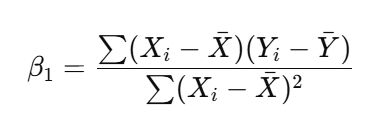

Intercepto Œ≤0:

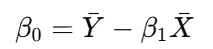

Pronosticar valores a partir de lo calculado

Y^i=Œ≤0+Œ≤1Xi <-----Valor pronosticado

Para cada predicci√≥n calcular el œµi

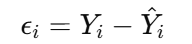

In [10]:

# Calcular las medias de X (Estatura de Padres) y Y (Estatura de Hijos)
mean_X = df_estatura['Estatura_Padres'].mean()
mean_Y = df_estatura['Estatura_Hijos'].mean()

# Calcular las desviaciones (X_i - mean_X) y (Y_i - mean_Y), su cuadrado y producto, para cada punto
df_estatura['X_i - mean_X'] = df_estatura['Estatura_Padres'] - mean_X
df_estatura['Y_i - mean_Y'] = df_estatura['Estatura_Hijos'] - mean_Y
df_estatura['(X_i - mean_X)^2'] = df_estatura['X_i - mean_X'] ** 2
df_estatura['(X_i - mean_X)*(Y_i - mean_Y)'] = df_estatura['X_i - mean_X'] * df_estatura['Y_i - mean_Y']

# Seleccionar una muestra de 10 puntos aleatorios para ilustrar el c√°lculo en la tabla
np.random.seed(123)  # Para reproducibilidad
sample_indices = np.random.choice(df_estatura.index, size=10, replace=False)
df_sample_proceso = df_estatura.loc[sample_indices, [
    'Estatura_Padres', 'Estatura_Hijos', 'X_i - mean_X', 'Y_i - mean_Y',
    '(X_i - mean_X)^2', '(X_i - mean_X)*(Y_i - mean_Y)'
]]

# A√±adir una fila de sumatorias necesarias para el c√°lculo de las betas
sumatorias = {
    'Estatura_Padres': ['Sumatorias'],
    'Estatura_Hijos': [''],
    'X_i - mean_X': [df_estatura['X_i - mean_X'].sum()],
    'Y_i - mean_Y': [df_estatura['Y_i - mean_Y'].sum()],
    '(X_i - mean_X)^2': [df_estatura['(X_i - mean_X)^2'].sum()],
    '(X_i - mean_X)*(Y_i - mean_Y)': [df_estatura['(X_i - mean_X)*(Y_i - mean_Y)'].sum()]
}

# Convertir la fila de sumatorias a un DataFrame y a√±adirla a la muestra
df_sumatorias = pd.DataFrame(sumatorias)
df_proceso_final = pd.concat([df_sample_proceso, df_sumatorias], ignore_index=True)

# Mostrar la tabla con el proceso completo

df_proceso_final



Estatura_Padres Estatura_Hijos  X_i - mean_X  Y_i - mean_Y  \
0       182.659363     143.460414  1.238827e+01  8.422547e+00   
1       174.684391     132.097237  4.413300e+00 -2.940630e+00   
2       186.609525     150.281527  1.633843e+01  1.524366e+01   
3       168.599313     136.671393 -1.671778e+00  1.633525e+00   
4       156.737345     131.891043 -1.353375e+01 -3.146824e+00   
5       159.143694      132.78212 -1.112740e+01 -2.255747e+00   
6       186.514365     143.427893  1.624327e+01  8.390026e+00   
7       157.059147     129.798656 -1.321194e+01 -5.239212e+00   
8        163.11131     138.853601 -7.159781e+00  3.815734e+00   
9       164.213997     131.983869 -6.057093e+00 -3.053999e+00   
10      Sumatorias                 3.154810e-12 -1.335820e-12   

    (X_i - mean_X)^2  (X_i - mean_X)*(Y_i - mean_Y)  
0         153.469279                     104.340801  
1          19.477221                     -12.977885  
2         266.944430                     249.057527  
3           2.794841                      -2.730892  
4         183.162263                      42.588321  
5         123.818959                      25.100593  
6         263.843971                     136.281493  
7         174.555463                      69.220173  
8          51.262458                     -27.319817  
9          36.688379                      18.498355  
10      12729.265592                    6259.027334

In [11]:
# Calcular beta_1 usando las sumatorias
beta_1_numerador = df_estatura['(X_i - mean_X)*(Y_i - mean_Y)'].sum()
beta_1_denominador = df_estatura['(X_i - mean_X)^2'].sum()
beta_1 = beta_1_numerador / beta_1_denominador

print(f"\nC√°lculo de beta_1 (pendiente):")
print(f"  Numerador = Sumatoria (X_i - mean_X)*(Y_i - mean_Y) = {beta_1_numerador}")
print(f"  Denominador = Sumatoria (X_i - mean_X)^2 = {beta_1_denominador}")
print(f"  Pendiente (Œ≤1) = Numerador / Denominador = {beta_1}")

# Calcular beta_0 (intercepto)
beta_0 = mean_Y - beta_1 * mean_X

print(f"\nC√°lculo de beta_0 (intercepto):")
print(f"  F√≥rmula: Œ≤0 = mean_Y - (Œ≤1 * mean_X)")
print(f"  mean_Y = {mean_Y}")
print(f"  mean_X = {mean_X}")
print(f"  Intercepto (Œ≤0) = {beta_0}")


C√°lculo de beta_1 (pendiente):
  Numerador = Sumatoria (X_i - mean_X)*(Y_i - mean_Y) = 6259.027333680966
  Denominador = Sumatoria (X_i - mean_X)^2 = 12729.26559224331
  Pendiente (Œ≤1) = Numerador / Denominador = 0.49170372700016246

C√°lculo de beta_0 (intercepto):
  F√≥rmula: Œ≤0 = mean_Y - (Œ≤1 * mean_X)
  mean_Y = 135.03786755790108
  mean_X = 170.27109073490357
  Intercepto (Œ≤0) = 51.31493764316616


In [12]:
beta_1_sklearn = modelo.coef_[0]  # Pendiente
beta_0_sklearn = modelo.intercept_  # Intercepto

# Imprimir los coeficientes obtenidos
print(f"Coeficiente (Pendiente, Œ≤1) usando scikit-learn: {beta_1_sklearn}")
print(f"Intercepto (Œ≤0) usando scikit-learn: {beta_0_sklearn}")

Coeficiente (Pendiente, Œ≤1) usando scikit-learn: 0.49170372700016246
Intercepto (Œ≤0) usando scikit-learn: 51.31493764316616


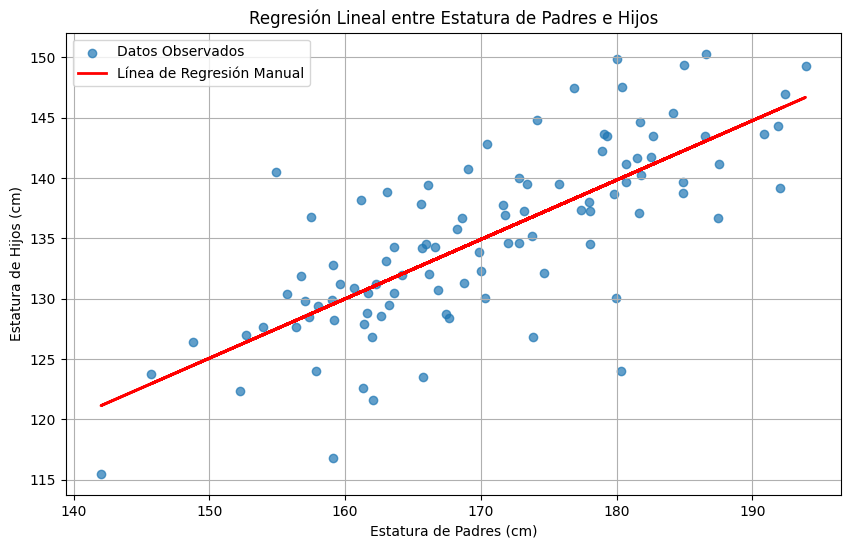

In [13]:
# Generar la l√≠nea de regresi√≥n manualmente calculada usando beta_0 y beta_1
df_estatura['Estatura_Hijos_Pred'] = beta_0 + beta_1 * df_estatura['Estatura_Padres']

# Crear la gr√°fica de dispersi√≥n de los datos originales y la l√≠nea de regresi√≥n
plt.figure(figsize=(10, 6))
plt.scatter(df_estatura['Estatura_Padres'], df_estatura['Estatura_Hijos'], label="Datos Observados", alpha=0.7)
plt.plot(df_estatura['Estatura_Padres'], df_estatura['Estatura_Hijos_Pred'], color="red", label="L√≠nea de Regresi√≥n Manual", linewidth=2)

# Configuraci√≥n del gr√°fico
plt.title("Regresi√≥n Lineal entre Estatura de Padres e Hijos")
plt.xlabel("Estatura de Padres (cm)")
plt.ylabel("Estatura de Hijos (cm)")
plt.legend()
plt.grid(True)
plt.show()


Veamos la salida del modelo

In [14]:
import statsmodels.api as sm

# Crear el modelo de regresi√≥n lineal usando statsmodels para obtener el resumen completo
X_with_const = sm.add_constant(df_estatura['Estatura_Padres'])  # A√±adir una constante para el intercepto
modelo_sm = sm.OLS(df_estatura['Estatura_Hijos'], X_with_const).fit()

# Obtener el resumen del modelo
resultado = modelo_sm.summary()
print(resultado)


                            OLS Regression Results                            
Dep. Variable:         Estatura_Hijos   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     128.3
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           1.66e-19
Time:                        20:35:13   Log-Likelihood:                -299.78
No. Observations:                 100   AIC:                             603.6
Df Residuals:                      98   BIC:                             608.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              51.3149      7.409     

## Supuestos. 

1. Linealidad
Supuesto: Existe una relaci√≥n lineal entre la variable independiente ùëã y la variable dependiente ùëå
C√≥mo verificarlo: Puedes visualizar la relaci√≥n entre ùëã e ùëå con un gr√°fico de dispersi√≥n. Tambi√©n es com√∫n observar los residuos frente a los valores predichos; deber√≠an mostrarse sin patrones claros.

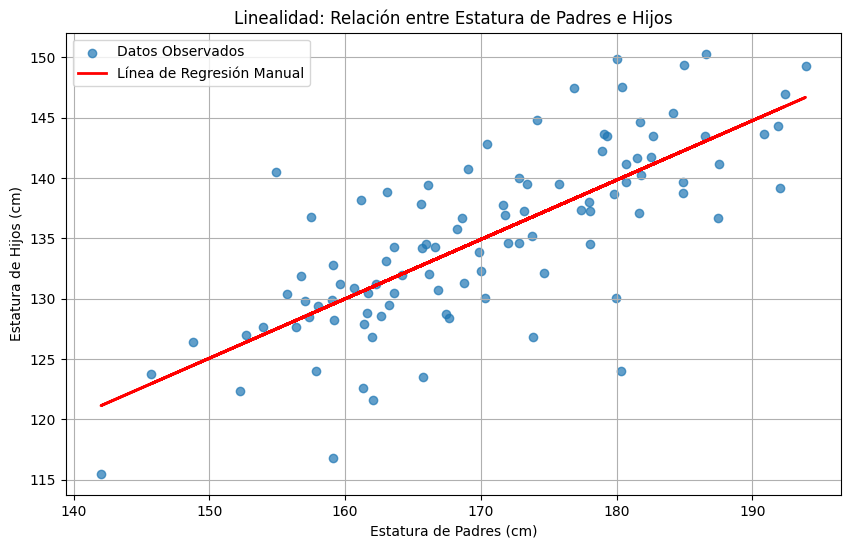

In [15]:
# Graficar la relaci√≥n entre la variable independiente (Estatura_Padres) y la dependiente (Estatura_Hijos)
plt.figure(figsize=(10, 6))
plt.scatter(df_estatura['Estatura_Padres'], df_estatura['Estatura_Hijos'], label="Datos Observados", alpha=0.7)
plt.plot(df_estatura['Estatura_Padres'], df_estatura['Estatura_Hijos_Pred'], color="red", label="L√≠nea de Regresi√≥n Manual", linewidth=2)

# Configuraci√≥n del gr√°fico
plt.title("Linealidad: Relaci√≥n entre Estatura de Padres e Hijos")
plt.xlabel("Estatura de Padres (cm)")
plt.ylabel("Estatura de Hijos (cm)")
plt.legend()
plt.grid(True)
plt.show()


2. Independencia de los errores

Independencia de los errores respecto a s√≠ mismos
Definici√≥n: Se refiere a que los errores (o residuos) no deben estar correlacionados entre s√≠. En otras palabras, el error asociado con una observaci√≥n no deber√≠a depender del error de otra observaci√≥n.
Importancia: Si los errores est√°n correlacionados entre s√≠, indica que el modelo puede estar pasando por alto alguna estructura subyacente en los datos que no se est√° modelando adecuadamente. Por ejemplo, en datos temporales, si los errores est√°n correlacionados, podr√≠a haber una estructura temporal (como una tendencia o estacionalidad) que no se ha capturado.

El estad√≠stico Durbin-Watson eval√∫a espec√≠ficamente la autocorrelaci√≥n de los errores. Es decir, mide si existe una correlaci√≥n entre el error de una observaci√≥n y el error de la observaci√≥n inmediatamente anterior en el conjunto de datos. Valor cercano a 2 no hay correlacion


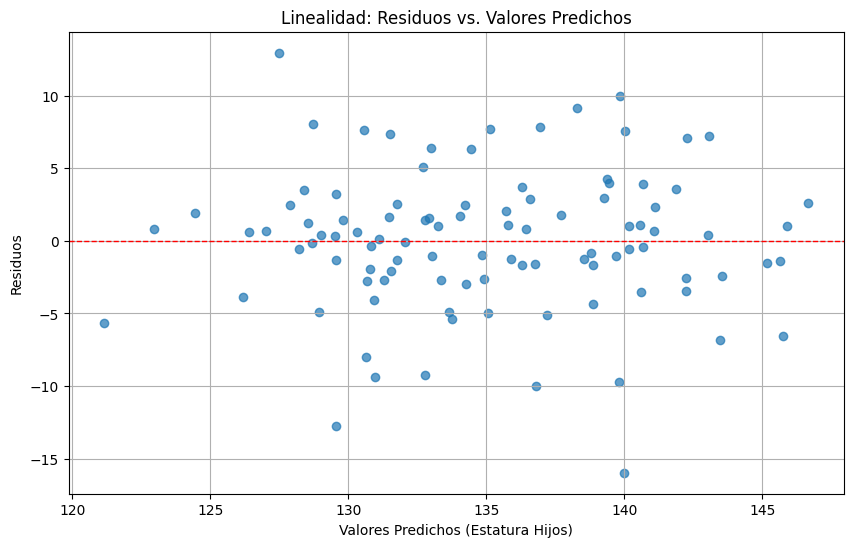

In [16]:
# Crear gr√°ficos espec√≠ficos para comparar residuos no correlacionados y residuos correlacionados


# Gr√°fico de residuos frente a los valores predichos
df_estatura['Residuos'] = df_estatura['Estatura_Hijos'] - df_estatura['Estatura_Hijos_Pred']

plt.figure(figsize=(10, 6))
plt.scatter(df_estatura['Estatura_Hijos_Pred'], df_estatura['Residuos'], alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--", linewidth=1)
plt.title("Linealidad: Residuos vs. Valores Predichos")
plt.xlabel("Valores Predichos (Estatura Hijos)")
plt.ylabel("Residuos")
plt.grid(True)
plt.show()


El estad√≠stico de Durbin-Watson es aproximadamente 
1.86
1.86.

Un valor de Durbin-Watson cercano a 2 sugiere que no hay autocorrelaci√≥n en los residuos, lo cual cumple el supuesto de independencia de los errores.
Valores cercanos a 0 indican autocorrelaci√≥n positiva, mientras que valores cercanos a 4 indican autocorrelaci√≥n negativa.
En este caso, el valor de 
1.86
1.86 indica que no hay problemas significativos de autocorrelaci√≥n, por lo que el supuesto de independencia de los errores se cumple.

3. Homocedasticidad

Independencia de los errores respecto a ùëå
Definici√≥n: La independencia de los errores respecto a ùëå significa que los errores no deben estar relacionados con la variable dependiente que estamos tratando de predecir. 
Importancia: Si los errores est√°n correlacionados con ùëå esto sugiere que la variabilidad en Y no se explica completamente con las variables independientes, lo que puede indicar que el modelo no captura correctamente la relaci√≥n entre ùëã e ùëå Esto tambi√©n puede implicar que existe heterocedasticidad, donde la variabilidad de los errores cambia dependiendo del valor de ùëå o de los valores de ùëã.


In [17]:
import statsmodels.api as sm

# Prueba de Breusch-Pagan para la homocedasticidad
# Agregar una constante al modelo
X_with_const = sm.add_constant(df_estatura['Estatura_Padres'])
bp_test = sm.stats.diagnostic.het_breuschpagan(df_estatura['Residuos'], X_with_const)

# Resultados del test de Breusch-Pagan
bp_stat, bp_pvalue = bp_test[0], bp_test[1]
print(f"Estad√≠stico de Breusch-Pagan: {bp_stat}")
print(f"p-valor de Breusch-Pagan: {bp_pvalue}")


Estad√≠stico de Breusch-Pagan: 0.02649053219929698
p-valor de Breusch-Pagan: 0.8707080939481201


Para interpretar el resultado del test de Breusch-Pagan

Estad√≠stico de Breusch-Pagan: Este valor refleja la magnitud de la heterocedasticidad detectada en los residuos del modelo. Sin embargo, el n√∫mero exacto en s√≠ no es tan relevante para tomar decisiones. En cambio, el p-valor asociado a este estad√≠stico es lo que se utiliza para juzgar la significancia.

p-valor: El p-valor es la clave para interpretar la prueba. Compara el p-valor con un nivel de significancia com√∫n (como 0.05):

Si el p-valor es bajo (generalmente menor a 0.05 o 0.01), entonces se rechaza la hip√≥tesis nula de homocedasticidad. Esto sugiere que existe heterocedasticidad significativa en el modelo, y la varianza de los errores cambia en funci√≥n de las variables independientes.
Si el p-valor es alto (mayor a 0.05), no hay suficiente evidencia para rechazar la hip√≥tesis nula de homocedasticidad. Esto indica que los residuos parecen tener varianza constante y que la heterocedasticidad no es un problema significativo en el modelo.

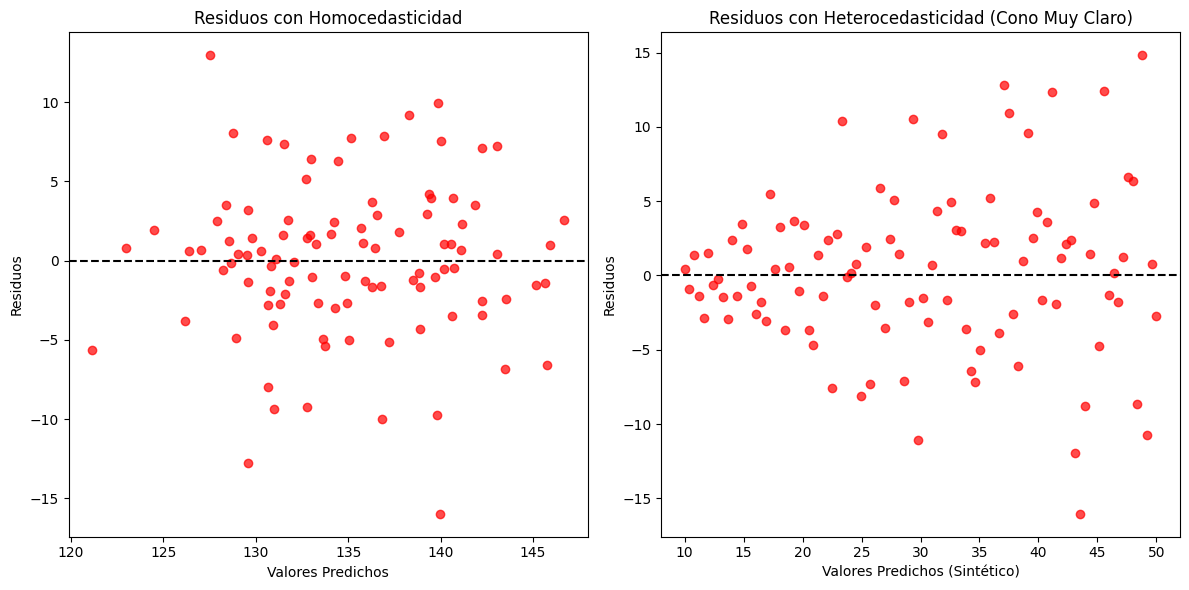

In [18]:
# Crear gr√°ficos con datos completamente sint√©ticos para simular un caso de heterocedasticidad con un "cono" muy claro

# Generar valores predichos sint√©ticos
x_sintetico = np.linspace(10, 50, 100)

# Crear residuos con heterocedasticidad pronunciada (cono) para simular el efecto deseado
residuos_heterocedasticidad_cono_sintetico = np.random.normal(0, 1, 100) * np.linspace(1, 10, 100)

plt.figure(figsize=(12, 6))

# Gr√°fico de residuos con homocedasticidad usando datos originales
plt.subplot(1, 2, 1)
plt.scatter(df_estatura['Estatura_Hijos_Pred'], df_estatura['Residuos'], alpha=0.7, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuos con Homocedasticidad")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")

# Gr√°fico de residuos sint√©ticos con heterocedasticidad en forma de cono muy claro
plt.subplot(1, 2, 2)
plt.scatter(x_sintetico, residuos_heterocedasticidad_cono_sintetico, alpha=0.7, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuos con Heterocedasticidad (Cono Muy Claro)")
plt.xlabel("Valores Predichos (Sint√©tico)")
plt.ylabel("Residuos")

plt.tight_layout()
plt.show()


4. Normalidad de los residuos

 Errores est√°n distribuidos de forma normal, es decir, siguen una distribuci√≥n normal con una media de cero. Esta es una suposici√≥n clave en la regresi√≥n lineal y otros modelos estad√≠sticos, ya que garantiza la validez de inferencias estad√≠sticas, como la construcci√≥n de intervalos de confianza y la realizaci√≥n de pruebas de hip√≥tesis.


Resultados de la Prueba de Shapiro-Wilk para Residuos Normales:
Estad√≠stico de Shapiro-Wilk: 0.9888379935873263
p-valor de Shapiro-Wilk: 0.5718804768884322

Resultados de la Prueba de Shapiro-Wilk para Residuos No Normales:
Estad√≠stico de Shapiro-Wilk: 0.7836176168186411
p-valor de Shapiro-Wilk: 8.013137812927239e-11



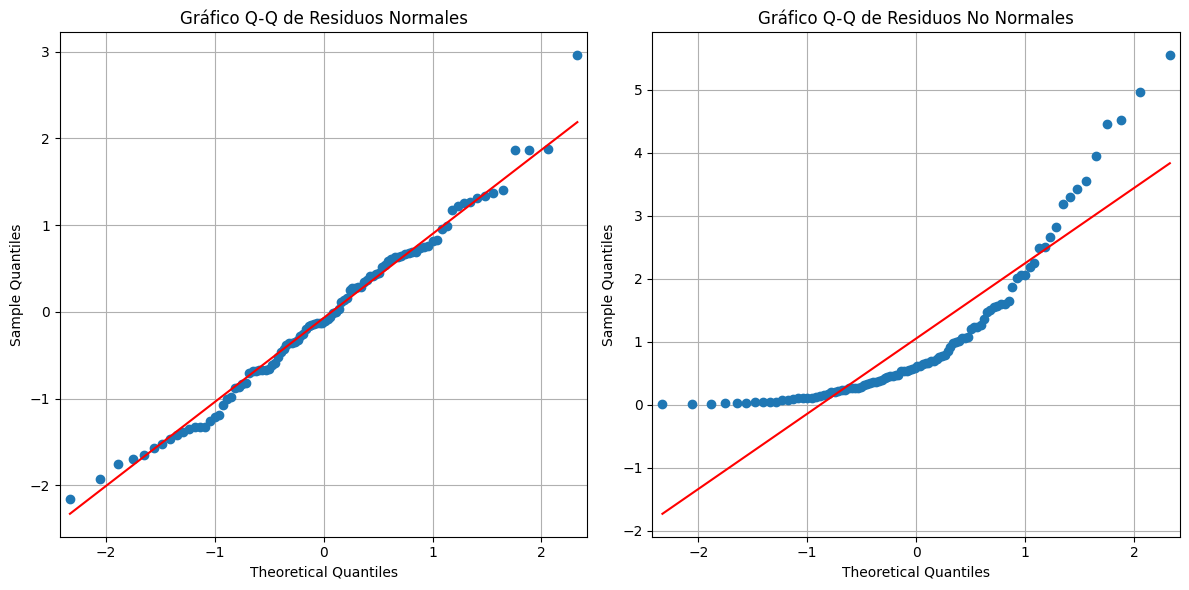

In [19]:

# Generar residuos que no siguen una distribuci√≥n normal (distribuci√≥n exponencial)
residuos_no_normales = np.random.exponential(scale=1, size=100)

# Crear un DataFrame para almacenar los residuos simulados
df_estatura_no_normal = pd.DataFrame({'Residuos': residuos_no_normales})

# Prueba de Shapiro-Wilk para verificar la normalidad en residuos no normales
shapiro_stat, shapiro_pvalue = stats.shapiro(df_estatura_no_normal['Residuos'])

# Generar residuos que siguen una distribuci√≥n normal para comparaci√≥n
residuos_normales = np.random.normal(loc=0, scale=1, size=100)
df_estatura_normal = pd.DataFrame({'Residuos': residuos_normales})

# Prueba de Shapiro-Wilk para verificar la normalidad en residuos normales
shapiro_stat_normal, shapiro_pvalue_normal = stats.shapiro(df_estatura_normal['Residuos'])

# Imprimir los resultados de la prueba de Shapiro-Wilk para ambos casos
print("Resultados de la Prueba de Shapiro-Wilk para Residuos Normales:")
print(f"Estad√≠stico de Shapiro-Wilk: {shapiro_stat_normal}")
print(f"p-valor de Shapiro-Wilk: {shapiro_pvalue_normal}\n")

print("Resultados de la Prueba de Shapiro-Wilk para Residuos No Normales:")
print(f"Estad√≠stico de Shapiro-Wilk: {shapiro_stat}")
print(f"p-valor de Shapiro-Wilk: {shapiro_pvalue}\n")

# Gr√°ficos Q-Q para ambos conjuntos de residuos (normales y no normales) lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gr√°fico Q-Q de residuos normales
sm.qqplot(df_estatura_normal['Residuos'], line='s', ax=axes[0])
axes[0].set_title("Gr√°fico Q-Q de Residuos Normales")
axes[0].grid(True)

# Gr√°fico Q-Q de residuos no normales
sm.qqplot(df_estatura_no_normal['Residuos'], line='s', ax=axes[1])
axes[1].set_title("Gr√°fico Q-Q de Residuos No Normales")
axes[1].grid(True)

plt.tight_layout()
plt.show()


El valor del estadistico no es tan relevante como el valor P. Con un p-valor mayor a 0.05, no se rechaza la hip√≥tesis nula de normalidad. Esto significa que hay suficiente evidencia para suponer que estos residuos son normales.


Validaci√≥n cruzada

## Desplegarlo

In [20]:
!pip install flask 

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


Exportamos el modelo

In [ ]:
# Ajustar el modelo de regresi√≥n lineal
modelo = LinearRegression()
X = df_estatura[['Estatura_Padres']]
y = df_estatura['Estatura_Hijos']
modelo.fit(X, y) 

import pickle
# Guardar el modelo entrenado
with open('modelo_entrenado.pkl', 'wb') as file:
     pickle.dump(modelo, file)

In [22]:
from flask import Flask, render_template, request
from sklearn.linear_model import LinearRegression
import numpy as np
import pickle

# Cargar el modelo desde el archivo .pkl
with open('modelo_entrenado.pkl', 'rb') as file:
    modelo = pickle.load(file)

# Extraer los coeficientes del modelo entrenado
beta_0 = modelo.intercept_  # Intercepto
beta_1 = modelo.coef_[0]    # Pendiente

# Inicializa la aplicaci√≥n Flask
app = Flask(__name__)

# Ruta principal para la p√°gina de inicio
@app.route('/', methods=['GET', 'POST'])
def index():
    resultado = None
    if request.method == 'POST':
        # Obtener la estatura de los padres ingresada por el usuario
        estatura_padres = request.form.get('estatura_padres')
        
        try:
            # Convertir la entrada a float y calcular la estatura del hijo
            estatura_padres = float(estatura_padres)
            estatura_hijo_predicha = beta_0 + beta_1 * estatura_padres
            resultado = f"Predicci√≥n de estatura del hijo: {estatura_hijo_predicha:.2f} cm"
        except ValueError:
            resultado = "Por favor, ingresa un valor num√©rico v√°lido para la estatura."
    
    # Renderizar el template HTML con el resultado
    return render_template('index.html', resultado=resultado)

# Ejecutar la aplicaci√≥n
if __name__ == '__main__':
    app.run(debug=False)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [07/Feb/2025 20:42:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Feb/2025 20:44:39] "POST / HTTP/1.1" 200 -
